In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [2]:
inpatient=pd.read_csv('F:/KIRTI/python/case studies and assign/9. End to End Foundation Case Study-1/9. End to End Foundation Case Study-1/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')
outpatient=pd.read_csv('F:/KIRTI/python/case studies and assign/9. End to End Foundation Case Study-1/9. End to End Foundation Case Study-1/Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')

In [4]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ M

In [4]:
inpatient.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [5]:
inpatient.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.958434,9707.477867,8494.495174
std,151563.671767,27854.323080,51.104042,35065.365905,7664.642652,7309.467247
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.909091
25%,110092.000000,27261.000000,17.000000,15947.166670,5234.500000,4192.354839
50%,250007.000000,44309.000000,27.000000,25245.823530,7214.100000,6158.465116
75%,380075.000000,72901.000000,49.000000,43232.592590,11286.400000,10056.882350
max,670077.000000,99835.000000,3383.000000,929118.909100,156158.181800,154620.818200


In [6]:
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [7]:
outpatient.head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


In [8]:
outpatient.describe()

,Provider Id,Provider Zip Code,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
count,43372.000000,43372.000000,43372.000000,43372.000000,43372.000000
mean,265410.921747,49041.022434,587.980955,1473.994047,265.425586
std,152729.927698,27497.899751,3280.397168,1837.530791,261.260146
min,10001.000000,1040.000000,11.000000,12.643750,7.305000
25%,140043.000000,28645.000000,42.000000,284.610498,74.627714
50%,260091.000000,46342.000000,128.000000,709.995188,139.298570
75%,390101.000000,73101.000000,347.000000,2102.121346,394.211316
max,670061.000000,99801.000000,219042.000000,32105.636360,2062.470526


# Part 1-Providers overcharged for procedures

In [37]:
# Part 1 (A)- Highest cost Variations

In [ ]:
# for inpatients

In [9]:
a=inpatient[['DRG Definition','Provider State','Average Medicare Payments']]
a.head(10)

,DRG Definition,Provider State,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4851.444444
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,5374.149254
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4761.411765
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,5858.500000
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,5228.400000
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4386.941176


In [10]:
amax=a.loc[a.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
amin=a.loc[a.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmin()].reset_index(drop=True)

In [11]:
a1=amax.copy()
a1['Variations']=amax['Average Medicare Payments']-amin['Average Medicare Payments']

In [12]:
del a1['Average Medicare Payments']
a1.loc[a1.groupby(['DRG Definition'])['Variations'].idxmax()].head()

,DRG Definition,Provider State,Variations
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MD,11506.646106
55,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,CA,18335.419643
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,MD,40323.965461
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,17437.811237
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,9972.780745


In [ ]:
# for outpatients

In [13]:
a2=outpatient[['APC','Provider State','Average Total Payments']]
a2.head(10)

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AL,21.910435
1,0012 - Level I Debridement & Destruction,AK,36.623853
2,0012 - Level I Debridement & Destruction,AZ,14.541841
3,0012 - Level I Debridement & Destruction,AZ,23.736000
4,0012 - Level I Debridement & Destruction,AZ,16.569091
5,0012 - Level I Debridement & Destruction,AR,13.573774
6,0012 - Level I Debridement & Destruction,AR,28.401027
7,0012 - Level I Debridement & Destruction,AR,18.256667
8,0012 - Level I Debridement & Destruction,AR,13.172683
9,0012 - Level I Debridement & Destruction,AR,12.646667


In [14]:
amax=a2.loc[a2.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop=True)
amin=a2.loc[a2.groupby(['APC','Provider State'])['Average Total Payments'].idxmin()].reset_index(drop=True)

In [15]:
a3=amax.copy()
a3['Variations']=amax['Average Total Payments']-amin['Average Total Payments']

In [16]:
del a3['Average Total Payments']
a3.loc[a3.groupby(['APC'])['Variations'].idxmax()].head()

,APC,Provider State,Variations
20,0012 - Level I Debridement & Destruction,MI,20.593261
51,0013 - Level II Debridement & Destruction,CA,47.025556
101,0015 - Level III Debridement & Destruction,CA,83.536505
175,0019 - Level I Excision/ Biopsy,NY,180.010667
194,0020 - Level II Excision/ Biopsy,CA,296.625625


In [ ]:
# Part 1(B)- Highest cost claims by providers

In [ ]:
# for inpatients

In [17]:
b=inpatient[['DRG Definition','Provider Id','Average Medicare Payments']]
b.head(10)

,DRG Definition,Provider Id,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,4851.444444
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,5374.149254
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,4761.411765
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,5858.500000
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,5228.400000
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,4386.941176


In [18]:
bmax=b.loc[b.groupby(['DRG Definition','Provider Id'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)

In [22]:
bmax.loc[bmax.groupby(['DRG Definition'])['Average Medicare Payments'].idxmax().head()]

,DRG Definition,Provider Id,Average Medicare Payments
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,15855.18182
1554,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,22873.49398
2986,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,48632.28125
4156,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,23402.26316
6365,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,13710.23529


In [ ]:
# for outpatients

In [27]:
b=outpatient[['APC','Provider Id','Average Total Payments']]
b.head(10)

,APC,Provider Id,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,21.910435
1,0012 - Level I Debridement & Destruction,20024,36.623853
2,0012 - Level I Debridement & Destruction,30064,14.541841
3,0012 - Level I Debridement & Destruction,30088,23.736000
4,0012 - Level I Debridement & Destruction,30111,16.569091
5,0012 - Level I Debridement & Destruction,40016,13.573774
6,0012 - Level I Debridement & Destruction,40017,28.401027
7,0012 - Level I Debridement & Destruction,40036,18.256667
8,0012 - Level I Debridement & Destruction,40055,13.172683
9,0012 - Level I Debridement & Destruction,40118,12.646667


In [28]:
bmax=b.loc[b.groupby(['APC','Provider Id'])['Average Total Payments'].idxmax()].reset_index(drop=True)

In [29]:
bmax.loc[bmax.groupby(['APC'])['Average Total Payments'].idxmax().head()]

,APC,Provider Id,Average Total Payments
1,0012 - Level I Debridement & Destruction,20024,36.623853
424,0013 - Level II Debridement & Destruction,50334,85.930000
1874,0015 - Level III Debridement & Destruction,50153,142.186505
3322,0019 - Level I Excision/ Biopsy,50002,470.720000
3837,0020 - Level II Excision/ Biopsy,50153,808.850000


In [ ]:
# Part 1(C)-Highest cost claims by regions 

In [ ]:
# for inpatients

In [30]:
c=inpatient[['DRG Definition','Provider State','Average Medicare Payments']]
c.head(10)

,DRG Definition,Provider State,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4851.444444
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,5374.149254
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4761.411765
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,5858.500000
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,5228.400000
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4386.941176


In [32]:
cmax=c.loc[c.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)

In [33]:
cmax.loc[cmax.groupby(['DRG Definition'])['Average Medicare Payments'].idxmax().head()]

,DRG Definition,Provider State,Average Medicare Payments
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MD,15855.18182
71,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,MD,22873.49398
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,MD,48632.28125
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,23402.26316
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,13710.23529


In [ ]:
# for outpatients

In [34]:
c=outpatient[['APC','Provider State','Average Total Payments']]
c.head(10)

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AL,21.910435
1,0012 - Level I Debridement & Destruction,AK,36.623853
2,0012 - Level I Debridement & Destruction,AZ,14.541841
3,0012 - Level I Debridement & Destruction,AZ,23.736000
4,0012 - Level I Debridement & Destruction,AZ,16.569091
5,0012 - Level I Debridement & Destruction,AR,13.573774
6,0012 - Level I Debridement & Destruction,AR,28.401027
7,0012 - Level I Debridement & Destruction,AR,18.256667
8,0012 - Level I Debridement & Destruction,AR,13.172683
9,0012 - Level I Debridement & Destruction,AR,12.646667


In [35]:
cmax=c.loc[c.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop=True)

In [36]:
cmax.loc[cmax.groupby(['APC'])['Average Total Payments'].idxmax().head()]

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AK,36.623853
51,0013 - Level II Debridement & Destruction,CA,85.930000
101,0015 - Level III Debridement & Destruction,CA,142.186505
150,0019 - Level I Excision/ Biopsy,CA,470.720000
194,0020 - Level II Excision/ Biopsy,CA,808.850000


In [38]:
# Part 1(D)-Highest number of procedures and Largest Difference between claims and reimbursements 

In [40]:
d=inpatient[['DRG Definition','Provider State','Total Discharges','Average Medicare Payments','Average Total Payments']]
d.head(10)

,DRG Definition,Provider State,Total Discharges,Average Medicare Payments,Average Total Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,91,4763.736264,5777.241758
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,14,4976.714286,5787.571429
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,24,4453.791667,5434.958333
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,25,4129.160000,5417.560000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,18,4851.444444,5658.333333
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,67,5374.149254,6653.805970
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,51,4761.411765,5834.745098
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,32,5858.500000,8031.125000
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,135,5228.400000,6113.385185
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,34,4386.941176,5541.058824


In [ ]:
# Largest Difference between Average Total Payments and Average Medicare Payments per discharge

In [47]:
d['DPC']=(d['Average Total Payments']-d['Average Medicare Payments'])/d['Total Discharges']
d.drop(columns=['Total Discharges','Average Medicare Payments','Average Total Payments'],inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [52]:
dmax=d.loc[d.groupby(['DRG Definition','Provider State'])['DPC'].idxmax()]
dmax.loc[dmax.groupby(['DRG Definition'])['DPC'].idxmax()].head()

,DRG Definition,Provider State,DPC
280,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,IL,876.167969
1483,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,IN,314.899408
2795,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,IL,1020.664062
4557,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,HI,1410.236111
7228,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NJ,437.876033


In [68]:
d=outpatient[['APC','Provider State','Outpatient Services','Average  Estimated Submitted Charges','Average Total Payments']]
d.head(10)

,APC,Provider State,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,AL,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,AK,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,AZ,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,AZ,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,AZ,22,152.045455,16.569091
5,0012 - Level I Debridement & Destruction,AR,3166,58.954668,13.573774
6,0012 - Level I Debridement & Destruction,AR,438,143.639406,28.401027
7,0012 - Level I Debridement & Destruction,AR,21,115.630952,18.256667
8,0012 - Level I Debridement & Destruction,AR,41,80.102439,13.172683
9,0012 - Level I Debridement & Destruction,AR,12,16.993333,12.646667


In [69]:
#DPO=Difference between Average Total Payments and Average Estimated Submitted Charges per outservice
d['DPO']=(d['Average  Estimated Submitted Charges']-d['Average Total Payments'])/d['Outpatient Services']
d.drop(columns=['Outpatient Services','Average  Estimated Submitted Charges','Average Total Payments'],inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
dmax=d.loc[d.groupby(['APC','Provider State'])['DPO'].idxmax()]
dmax.loc[dmax.groupby(['APC'])['DPO'].idxmax()].head()

,APC,Provider State,DPO
157,0012 - Level I Debridement & Destruction,NE,55.162667
315,0013 - Level II Debridement & Destruction,AL,398.107692
2447,0015 - Level III Debridement & Destruction,MI,233.392562
3336,0019 - Level I Excision/ Biopsy,CA,2172.817083
4756,0020 - Level II Excision/ Biopsy,VA,1350.947190


# Part 2 

In [71]:
# Part 2 (A)-Providers least like others

In [112]:
#For inpatient
a=inpatient[['Provider Id','Average Medicare Payments']].groupby('Provider Id').mean().reset_index()
a.head()

,Provider Id,Average Medicare Payments
0,10001,7678.218337
1,10005,5793.635452
2,10006,7145.964071
3,10007,4047.029737
4,10008,4963.552805


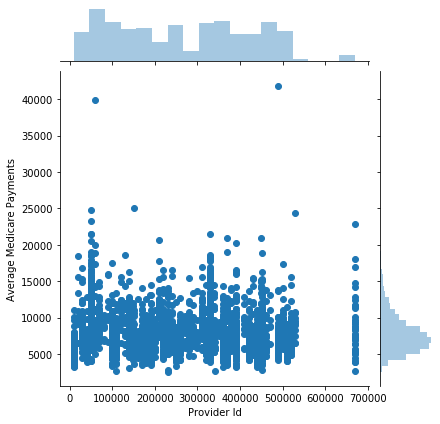

In [115]:
sns.jointplot(x='Provider Id', y='Average Medicare Payments', data=a)

In [118]:
model = LinearRegression()
model.fit(a['Provider Id'].values.reshape(-1,1),a['Average Medicare Payments'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
a['predict']=model.predict(a['Provider Id'].values.reshape(-1,1))
a['Residuals']=abs(a['predict']-a['Average Medicare Payments'])

In [123]:
a.sort_values('Residuals',ascending=False).head(3)

,Provider Id,Average Medicare Payments,predict,Residuals
3143,490142,41836.888890,7483.163626,34353.725264
540,60096,39943.173080,8420.791989,31522.381091
3295,530015,24350.493057,7396.228611,16954.264446


In [124]:
#For outpatient
a=outpatient[['Provider Id','Average Total Payments']].groupby('Provider Id').mean().reset_index()
a.head()

,Provider Id,Average Total Payments
0,10001,285.699426
1,10005,254.564837
2,10006,221.871666
3,10007,251.371890
4,10008,207.481575


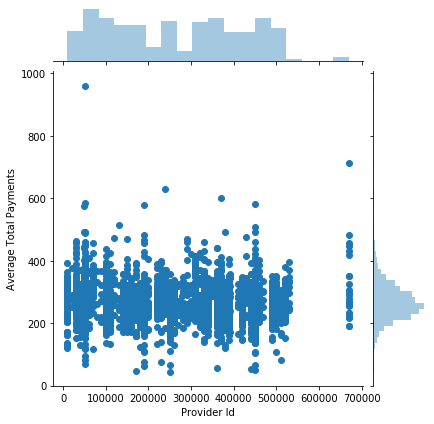

In [125]:
sns.jointplot(x='Provider Id', y='Average Total Payments', data=a)

In [126]:
model = LinearRegression()
model.fit(a['Provider Id'].values.reshape(-1,1),a['Average Total Payments'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
a['predict']=model.predict(a['Provider Id'].values.reshape(-1,1))
a['Residuals']=abs(a['predict']-a['Average Total Payments'])

In [128]:
a.sort_values('Residuals',ascending=False).head(3)

,Provider Id,Average Total Payments,predict,Residuals
432,50714,960.595632,275.415810,685.179823
3134,670061,712.396480,252.954963,459.441517
1474,240069,629.085289,268.548781,360.536508


In [71]:
# Part 2 (A)-Regions least like others

In [133]:
#For inpatient
a=inpatient[['Provider State','Average Medicare Payments']].groupby('Provider State').mean().reset_index()
a['state']=a.index
a.head()

,Provider State,Average Medicare Payments,state
0,AK,12958.973677,0
1,AL,6418.011329,1
2,AR,6919.725054,2
3,AZ,8825.721445,3
4,CA,11494.385763,4


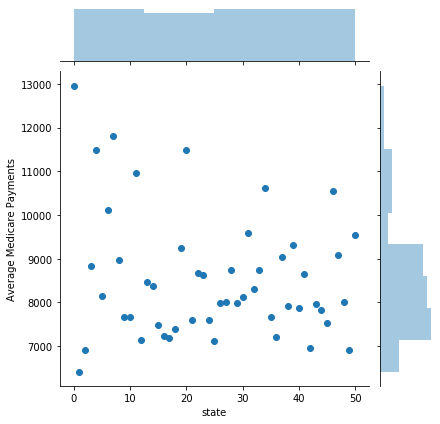

In [134]:
sns.jointplot(x='state', y='Average Medicare Payments', data=a)

In [135]:
model = LinearRegression()
model.fit(a['state'].values.reshape(-1,1),a['Average Medicare Payments'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
a['predict']=model.predict(a['state'].values.reshape(-1,1))
a['Residuals']=abs(a['predict']-a['Average Medicare Payments'])

In [137]:
a.sort_values('Residuals',ascending=False).head(3)

,Provider State,Average Medicare Payments,state,predict,Residuals
0,AK,12958.973677,0,8960.607913,3998.365764
7,DC,11811.972137,7,8843.385320,2968.586816
20,MD,11480.126155,20,8625.686221,2854.439934


In [139]:
#For outpatient
a=outpatient[['Provider State','Average Total Payments']].groupby('Provider State').mean().reset_index()
a['state']=a.index
a.head()

,Provider State,Average Total Payments,state
0,AK,288.362928,0
1,AL,267.136711,1
2,AR,237.373479,2
3,AZ,277.899929,3
4,CA,297.771481,4


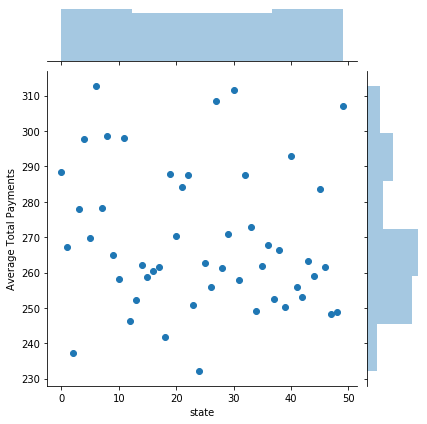

In [140]:
sns.jointplot(x='state', y='Average Total Payments', data=a)

In [141]:
model = LinearRegression()
model.fit(a['state'].values.reshape(-1,1),a['Average Total Payments'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
a['predict']=model.predict(a['state'].values.reshape(-1,1))
a['Residuals']=abs(a['predict']-a['Average Total Payments'])

In [143]:
a.sort_values('Residuals',ascending=False).head(3)

,Provider State,Average Total Payments,state,predict,Residuals
30,NJ,311.496332,30,268.030556,43.465776
49,WY,307.213348,49,264.300992,42.912357
6,CT,312.802783,6,272.741585,40.061198


#  Part 3

In [144]:
# Medicare Patients who are involved in anomalous activities  

In [3]:
history=pd.read_csv('F:/KIRTI/python/case studies and assign/9. End to End Foundation Case Study-1/9. End to End Foundation Case Study-1/Patient_history_samp.csv')
history.head()

,id,age,gender,income
0,306535165,65-74,F,24000-31999
1,742231134,65-74,F,48000+
2,928807201,75-84,M,24000-31999
3,83686538,<65,F,32000-47999
4,755607449,65-74,F,48000+


In [4]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
id        500000 non-null int64
age       497470 non-null object
gender    500000 non-null object
income    497469 non-null object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [5]:
history.describe()

,id
count,5.000000e+05
mean,5.001562e+08
std,2.884206e+08
min,7.561000e+03
25%,2.505402e+08
50%,5.001085e+08
75%,7.495556e+08
max,9.999957e+08


In [6]:
history['age']=history.age.fillna(history.age.mode().ix[0])
history['income']=history.income.fillna(history.income.mode().ix[0])

In [7]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
id        500000 non-null int64
age       500000 non-null object
gender    500000 non-null object
income    500000 non-null object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [8]:
trans=pd.read_csv('F:/KIRTI/python/case studies and assign/9. End to End Foundation Case Study-1/9. End to End Foundation Case Study-1/Transaction_coo.csv')
trans.head()

,id,global_proc_id,count
0,159125,1,1
1,191852,1,1
2,321083,1,1
3,383037,1,1
4,467729,1,1


In [9]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514809 entries, 0 to 1514808
Data columns (total 3 columns):
id                1514809 non-null int64
global_proc_id    1514809 non-null int64
count             1514809 non-null int64
dtypes: int64(3)
memory usage: 34.7 MB


In [10]:
trans.describe()

,id,global_proc_id,count
count,1.514809e+06,1.514809e+06,1514809.0
mean,5.000708e+08,3.847588e+01,1.0
std,2.883678e+08,3.123966e+01,0.0
min,7.561000e+03,1.000000e+00,1.0
25%,2.504427e+08,2.200000e+01,1.0
50%,4.999363e+08,2.600000e+01,1.0
75%,7.493563e+08,4.200000e+01,1.0
max,9.999957e+08,1.300000e+02,1.0


In [11]:
trans=trans[['id','count']].groupby('id').sum()

In [12]:
history.set_index('id',inplace=True)

In [13]:
patient_trans=pd.merge(trans,history,
              left_on='id',right_on='id',
                    how='inner')

In [14]:
patient_trans.head()

,count,age,gender,income
id,,,,
7561,2,65-74,M,48000+
7619,2,<65,F,48000+
10479,4,65-74,F,<16000
13515,2,75-84,M,<16000
15213,6,85+,M,32000-47999


In [15]:
patient_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 7561 to 999995713
Data columns (total 4 columns):
count     500000 non-null int64
age       500000 non-null object
gender    500000 non-null object
income    500000 non-null object
dtypes: int64(1), object(3)
memory usage: 19.1+ MB


In [17]:
conti_vars=patient_trans[['count']]

In [18]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [19]:
cat_vars = patient_trans[['age','gender','income']]

# for c_feature in categorical_features
for c_feature in ['age','gender','income']:
    cat_vars[c_feature] = cat_vars[c_feature].astype('category')
    cat_vars = create_dummies(cat_vars, c_feature)
 

cat_vars.head()

,age_75-84,age_85+,age_<65,gender_M,income_24000-31999,income_32000-47999,income_48000+,income_<16000
id,,,,,,,,
7561,0,0,0,1,0,0,1,0
7619,0,0,1,0,0,0,1,0
10479,0,0,0,0,0,0,0,1
13515,1,0,0,1,0,0,0,1
15213,0,1,0,1,0,1,0,0


In [20]:
patient_trans = pd.concat([conti_vars,cat_vars], axis = 1)
patient_trans.head()

,count,age_75-84,age_85+,age_<65,gender_M,income_24000-31999,income_32000-47999,income_48000+,income_<16000
id,,,,,,,,,
7561,2,0,0,0,1,0,0,1,0
7619,2,0,0,1,0,0,0,1,0
10479,4,0,0,0,0,0,0,0,1
13515,2,1,0,0,1,0,0,0,1
15213,6,0,1,0,1,0,1,0,0


In [21]:
sc=StandardScaler()

patient_trans_scaled=sc.fit_transform(patient_trans)

In [22]:
patient_trans_new=pd.DataFrame(patient_trans_scaled)
patient_trans_new.columns=patient_trans.columns
patient_trans_new.index=patient_trans.index

In [23]:
patient_trans_new.head()

,count,age_75-84,age_85+,age_<65,gender_M,income_24000-31999,income_32000-47999,income_48000+,income_<16000
id,,,,,,,,,
7561,-0.705660,-0.589644,-0.385122,-0.451183,1.103364,-0.422289,-0.487149,1.795304,-0.523474
7619,-0.705660,-0.589644,-0.385122,2.216394,-0.906319,-0.422289,-0.487149,1.795304,-0.523474
10479,0.706315,-0.589644,-0.385122,-0.451183,-0.906319,-0.422289,-0.487149,-0.557009,1.910315
13515,-0.705660,1.695939,-0.385122,-0.451183,1.103364,-0.422289,-0.487149,-0.557009,1.910315
15213,2.118289,-0.589644,2.596578,-0.451183,1.103364,-0.422289,2.052759,-0.557009,-0.523474


In [24]:
patient_tran=LocalOutlierFactor(n_neighbors=50,n_jobs=-1,contamination=0.002)

In [25]:
medicare_patient=patient_tran.fit_predict(patient_trans_new)

In [26]:
label=pd.DataFrame(medicare_patient)
label.index=patient_trans_new.index
label.columns=['label']

In [27]:
label.label.value_counts()

 1    499014
-1       986
Name: label, dtype: int64

In [28]:
medicare_patients=patient_trans_new[label.label==-1]

In [29]:
#Required list of people involved in malicious activities
medicare_patients

,count,age_75-84,age_85+,age_<65,gender_M,income_24000-31999,income_32000-47999,income_48000+,income_<16000
id,,,,,,,,,
1552051,4.236251,-0.589644,2.596578,-0.451183,-0.906319,-0.422289,-0.487149,-0.557009,1.910315
2385395,4.942239,1.695939,-0.385122,-0.451183,-0.906319,-0.422289,-0.487149,-0.557009,-0.523474
2462212,3.530264,-0.589644,2.596578,-0.451183,1.103364,-0.422289,-0.487149,-0.557009,-0.523474
2673778,3.530264,-0.589644,2.596578,-0.451183,1.103364,-0.422289,-0.487149,-0.557009,1.910315
2777478,3.530264,1.695939,-0.385122,-0.451183,1.103364,2.368045,-0.487149,-0.557009,-0.523474
3451946,3.530264,-0.589644,-0.385122,2.216394,-0.906319,-0.422289,-0.487149,-0.557009,-0.523474
3967912,3.530264,1.695939,-0.385122,-0.451183,1.103364,-0.422289,2.052759,-0.557009,-0.523474
4456190,3.530264,1.695939,-0.385122,-0.451183,-0.906319,2.368045,-0.487149,-0.557009,-0.523474
5848900,3.530264,-0.589644,-0.385122,2.216394,1.103364,-0.422289,-0.487149,-0.557009,-0.523474
